In [120]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from astropy.coordinates import SkyCoord
import astropy.units as u
import seaborn as sns

sns.set()



In [121]:
def init_sky(projection='mollweide', ra_center=120,
             galactic_plane_color='red', ecliptic_plane_color='red',
             ax=None):
    """Initialize matplotlib axes with a projection of the full sky.

    Parameters
    ----------
    projection : :class:`str`, optional
        Projection to use. Defaults to 'mollweide'.  To show the available projections,
        call :func:`matplotlib.projections.get_projection_names`.
    ra_center : :class:`float`, optional
        Projection is centered at this RA in degrees. Default is +120°, which avoids splitting
        the DESI northern and southern regions.
    galactic_plane_color : color name, optional
        Draw a solid curve representing the galactic plane using the specified color, or do
        nothing when ``None``.
    ecliptic_plane_color : color name, optional
        Draw a dotted curve representing the ecliptic plane using the specified color, or do
        nothing when ``None``.
    ax : :class:`~matplotlib.axes.Axes`, optional
        Axes to use for drawing this map, or create new axes if ``None``.

    Returns
    -------
    :class:`~matplotlib.axes.Axes`
        A matplotlib Axes object.  Helper methods ``projection_ra()`` and ``projection_dec()``
        are added to the object to facilitate conversion to projection coordinates.

    Notes
    -----
    If requested, the ecliptic and galactic planes are plotted with ``zorder`` set to 20.
    This keeps them above most other plotted objects, but legends should be set to
    a ``zorder`` higher than this value, for example::

        leg = ax.legend(ncol=2, loc=1)
        leg.set_zorder(25)
    """
    #
    # Internal functions.
    #
    def projection_ra(self, ra):
        r"""Shift `ra` to the origin of the Axes object and convert to radians.

        Parameters
        ----------
        ra : array-like
            Right Ascension in degrees.

        Returns
        -------
        array-like
            `ra` converted to plot coordinates.

        Notes
        -----
        In matplotlib, map projections expect longitude (RA), latitude (Dec)
        in radians with limits :math:`[-\pi, \pi]`, :math:`[-\pi/2, \pi/2]`,
        respectively.
        """
        #
        # Shift RA values.
        #
        r = np.remainder(ra + 360 - ra_center, 360)
        #
        # Scale conversion to [-180, 180].
        #
        r[r > 180] -= 360
        #
        # Reverse the scale: East to the left.
        #
        r = -r
        return np.radians(r)

    def projection_dec(self, dec):
        """Shift `dec` to the origin of the Axes object and convert to radians.

        Parameters
        ----------
        dec : array-like
            Declination in degrees.

        Returns
        -------
        array-like
            `dec` converted to plot coordinates.
        """
        return np.radians(dec)
    #
    # Create ax.
    #
    if ax is None:
        fig = plt.figure(figsize=(10.0, 5.0), dpi=100)
        ax = plt.subplot(111, projection=projection)
    #
    # Prepare labels.
    #
    base_tick_labels = np.array([150, 120, 90, 60, 30, 0, 330, 300, 270, 240, 210])
    base_tick_labels = np.remainder(base_tick_labels+360+ra_center, 360)
    tick_labels = np.array(['{0}°'.format(l) for l in base_tick_labels])
    #
    # Galactic plane.
    #
    if galactic_plane_color is not None:
        galactic_l = np.linspace(0, 2 * np.pi, 1000)
        galactic = SkyCoord(l=galactic_l*u.radian, b=np.zeros_like(galactic_l)*u.radian,
                            frame='galactic').transform_to(ICRS)
        #
        # Project to map coordinates and display.  Use a scatter plot to
        # avoid wrap-around complications.
        #

        # Make sure the galactic plane stays above other displayed objects.
    #
    # Ecliptic plane.
    #
    if ecliptic_plane_color is not None:
        ecliptic_l = np.linspace(0, 2 * np.pi, 50)
        ecliptic = SkyCoord(lon=ecliptic_l*u.radian, lat=np.zeros_like(ecliptic_l)*u.radian, distance=1 * u.Mpc,
                            frame='heliocentrictrueecliptic').transform_to(ICRS)
    #
    # Set RA labels.
    #
    labels = ax.get_xticklabels()
    for l, item in enumerate(labels):
        item.set_text(tick_labels[l])
    ax.set_xticklabels(labels)
    #
    # Set axis labels.
    #
    ax.set_xlabel('R.A. [deg]')
    ax.set_ylabel('Dec. [deg]')
    ax.grid(True)
    #
    # Attach helper methods.
    #
    ax._ra_center = ra_center
    ax.projection_ra = MethodType(projection_ra, ax)
    ax.projection_dec = MethodType(projection_dec, ax)
    return ax, ecliptic, galactic

In [122]:
from matplotlib.projections import get_projection_names
from astropy.coordinates import ICRS
# from desiutil.plots import prepare_data, init_sky, plot_grid_map, plot_healpix_map, plot_sky_circles, plot_sky_binned

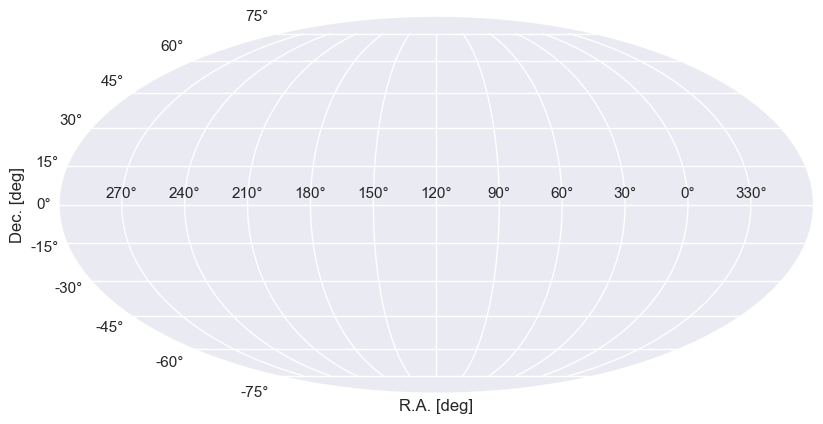

In [123]:
fig, ax, ecliptic, galactic = init_sky()
# ecliptic_ra_deg = np.concatenate((ecliptic.ra.degree[41:], ecliptic.ra.degree[0:41]))
# ecliptic_dec_deg = np.concatenate((ecliptic.dec.degree[41:], ecliptic.dec.degree[0:41]))
# galactic_ra_deg = np.concatenate((galactic.ra.degree[190:], galactic.ra.degree[:185]))
# galactic_dec_deg = np.concatenate((galactic.dec.degree[190:], galactic.dec.degree[:185]))


# # ax.scatter(ax.projection_ra(np.array([240])), ax.projection_dec(np.array([40])))
# ax.plot(ax.projection_ra(ecliptic_ra_deg), ax.projection_dec(ecliptic_dec_deg), color='black', ls='--', label='ecliptic')
# ax.plot(ax.projection_ra(galactic_ra_deg), ax.projection_dec(galactic_dec_deg), color='black')

# edfn_ra = np.array([269.73])
# edfn_dec = np.array([66.01])
# edfn = Circle((ax.projection_ra(edfn_ra), ax.projection_dec(edfn_dec)), np.sqrt(20/(np.pi))*np.pi/180, ls='--', edgecolor='black', facecolor='blue')
# ax.add_patch(edfn)



In [45]:
ecliptic.ra.degree

array([3.54660097e-03, 6.75007637e+00, 1.35313919e+01, 2.03810084e+01,
       2.73298239e+01, 3.44045568e+01, 4.16259531e+01, 4.90068327e+01,
       5.65501673e+01, 6.42475297e+01, 7.20783643e+01, 8.00105317e+01,
       8.80024144e+01, 9.60065274e+01, 1.03974158e+02, 1.11860230e+02,
       1.19627510e+02, 1.27249503e+02, 1.34711750e+02, 1.42011689e+02,
       1.49157453e+02, 1.56166083e+02, 1.63061554e+02, 1.69872888e+02,
       1.76632476e+02, 1.83374622e+02, 1.90134247e+02, 1.96945653e+02,
       2.03841228e+02, 2.10849992e+02, 2.17995912e+02, 2.25296020e+02,
       2.32758439e+02, 2.40380595e+02, 2.48148017e+02, 2.56034196e+02,
       2.64001890e+02, 2.72006016e+02, 2.79997860e+02, 2.87929941e+02,
       2.95760650e+02, 3.03457858e+02, 3.11001023e+02, 3.18381731e+02,
       3.25602964e+02, 3.32677551e+02, 3.39626247e+02, 3.46475775e+02,
       3.53257035e+02, 3.54660097e-03])

In [71]:
def deg(x):
    return x *180/np.pi

In [5]:
def rad(x):
    return x*np.pi/180

In [355]:
PI = np.pi
HALFPI = PI / 2.0
D2R = PI / 180.0
R2D = 1.0 / D2R

_centra = 185.
_centdec = 32.5
_sdsspar = {'center_ra': _centra,
            'center_dec': _centdec,
            'node': (_centra - 90.0) * D2R,
            'etapole': _centdec * D2R,
            'etaoffset': 91.25,}

def atbound(longitude, minval, maxval):
    """
    Wraps the longitude until it is within the bounds. The bounds must define an entire circle (e.g
    180 to 180 or 0 to 360)
    """
    w, = np.where(longitude < minval)
    while w.size > 0:
        longitude[w] += 360.0
        w, = np.where(longitude < minval)

    w, = np.where(longitude > maxval)
    while w.size > 0:
        longitude[w] -= 360.0
        w, = np.where(longitude > maxval)

def atbound2(theta, phi):
    """
    Wraps theta and phi to be between -180 and 180 for theta, and 0 and 360 for phi.
    """
    atbound(theta, -180.0, 180.0)

    w, = np.where(np.abs(theta) > 90.0)
    if w.size > 0:
        theta[w] = 180.0 - theta[w]
        phi[w] += 180.0

    atbound(theta, -180.0, 180.0)
    atbound(phi, 0.0, 360.0)

    w, = np.where(np.abs(theta) == 90.0)
    if w.size > 0:
        phi[w] = 0.0


In [351]:
def sdss2eq(clambda_in, ceta_in, dtype='f8'):
  
    """
    NAME:
      sdss2eq
    PURPOSE:
       Convert corrected clambda, ceta SDSS survey coordinate system t
       equatorial coords.
    CALLING SEQUENCE:
      from esutil import coords
      (ra, dec) = coords.sdss2eq(clambda, ceta, dtype='f8')
    INPUTS:
      clambda: Corrected Survey longitude (actually lattitude) in degrees
      ceta: Corrected Survey latitude (actually logitude) in degrees
    OPTIONAL INPUTS:
        dtype: The data type of output.  Default is 'f8'. See
        numpy.typeDict for a list of possible types.
    OUTPUTS:
      ra: Equatorial latitude in degrees.
      dec: Equatorial longitude in degrees.
    REVISION HISTORY:
      Written: 11-March-2006  Converted from IDL program.
    """
    D2R = np.pi / 180.0
    R2D = 1.0 / D2R
    # Make a copy as an array. ndmin=1 to avoid messed up scalar arrays
    clambda = np.array(clambda_in, ndmin=1, copy=True, dtype=dtype)
    ceta = np.array(ceta_in, ndmin=1, copy=True, dtype=dtype)

    # range checking
    if clambda.min() < -90.0 or clambda.max() > 90.0:
        raise ValueError('CLAMBDA must we within [-90,90]')
    if ceta.min() < -180.0 or ceta.max() > 180.0:
        raise ValueError('CETA must we within [-180,180]')

    clambda *= D2R
    ceta *= D2R

    x = -np.sin(clambda)
    y = np.cos(ceta + _sdsspar['etapole']) * np.cos(clambda)
    z = np.sin(ceta + _sdsspar['etapole']) * np.cos(clambda)

    ra = np.arctan2(y, x) + _sdsspar['node']
    dec = np.arcsin(z)

    ra *= R2D
    dec *= R2D
    atbound2(dec, ra)

    return (ra, dec)

In [8]:
# adapted from https://astronomy.stackexchange.com/questions/39404/how-to-plot-celestial-equator-in-galactic-coordinates-why-does-my-plot-appear
def ecl2gal(lon_ecl, lat_ecl, sdss=False):
    
    '''
    Transforms ecliptic coordinates to galactic ones.
    Then prepares them for matplotlib aitoff projection.
    '''
    
    ecl = SkyCoord(lon_ecl, lat_ecl, unit=u.deg, frame='barycentricmeanecliptic')
    gal = ecl.transform_to('galactic')

    # Minus appears because of “mapping from the inside” issue
    if sdss:
        l_gal, b_gal = gal.l.wrap_at('180d').radian, gal.b.radian
    else:
        l_gal, b_gal = -gal.l.wrap_at('180d').radian, gal.b.radian
    return l_gal, b_gal


def eq2gal(ra, dec, sdss=False):
    
    '''
    Transforms equatorial coordinates to galactic ones.
    Then prepares them for matplotlib aitoff projection. 
    '''
    
    eq = SkyCoord(ra, dec, unit=u.deg)
    gal = eq.galactic

    # Minus appears because of “mapping from the inside” issue
    if sdss:
        l_gal, b_gal = gal.l.wrap_at('180d').radian, gal.b.radian
    else:
        l_gal, b_gal = -gal.l.wrap_at('180d').radian, gal.b.radian
    return l_gal, b_gal


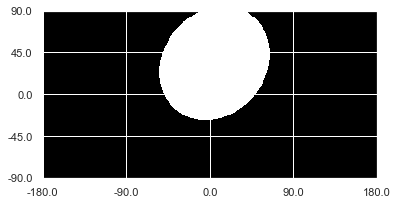

In [339]:
from astropy.modeling.models import Ellipse2D
from astropy.coordinates import Angle
import matplotlib.patches as mpatches
x0, y0 = 185, 32.5
a, b = 65, 55
theta = Angle(50, 'deg')
e = Ellipse2D(amplitude=1., x_0=x0, y_0=y0, a=a, b=b,
              theta=theta)
e2 = mpatches.Ellipse((x0, y0), 2*a, 2*b, theta.degree, edgecolor='red',
                      facecolor='none')
y, x = np.mgrid[-90:90, 0:360]
fig, ax = plt.subplots(1, 1)
ax.imshow(e(x, y), origin='lower', interpolation='none', cmap='Greys_r')

xticks = np.linspace(0, 360, 5)
ax.set_xticks(xticks)
ax.set_xticklabels(np.linspace(-180, 180, 5));

yticks = np.linspace(0, 2*90, 5)
ax.set_yticks(yticks)
ax.set_yticklabels(np.linspace(-90, 90, 5));
# plt.savefig('sdss_ellipse')

In [340]:
sdss_ellipse = e(x, y)
l_sdss = []
b_sdss = []
ra_sdss = []
dec_sdss = []
# y, x = np.mgrid[0:100, 100:300]

for i, dec in enumerate(np.arange(-90, 90)):
    for j, ra in enumerate(np.arange(-180, 180)):
        # print(i, j)
        if sdss_ellipse[i, j] != 0:
            # print('non+zero')
            ra_sdss.append(rad(ra))
            dec_sdss.append(rad(dec))
            # l, b = eq2gal(ra, dec)
            # l_sdss.append(l)
            # b_sdss.append(b)

In [341]:
info = []
with open('stripe_defs_sdss.txt','r') as f:
    for line in f:
        for word in line.split():
           info.append(word)

In [342]:
etas = np.array(info[2::5]).astype('float')
lmins = np.array(info[3::5]).astype('float')
lmaxs = np.array(info[4::5]).astype('float')

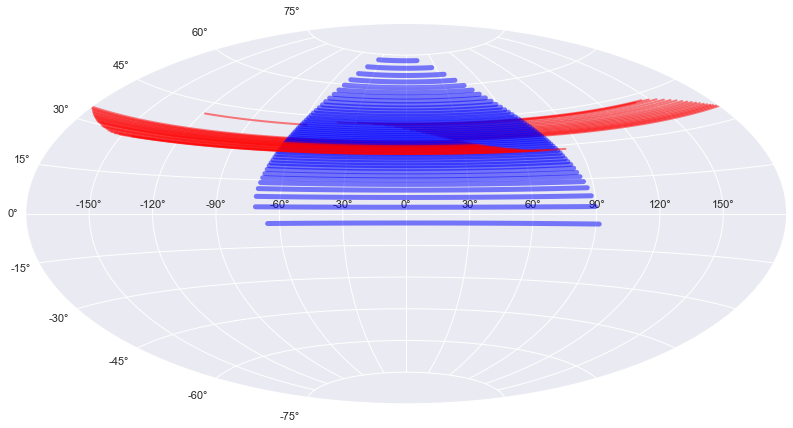

In [370]:
# Ecliptic plane

# lon_ecl = np.linspace(0, 360, 100)
# lat_ecl = np.zeros(100)

# l_ecl_gal, b_ecl_gal = ecl2gal(lon_ecl, lat_ecl)


plt.figure(figsize=(14,7))
ax = plt.subplot(111, projection='aitoff')
# ax.plot([rad(-60), rad(60)], [rad(0), rad(0)], lw=20, alpha=0.5, color='blue')
# ax.plot([rad(-60), rad(60)], [rad(10), rad(10)], lw=20, alpha=0.5, color='blue')
decs = []
for i in range(len(etas)):
    ra_min, dec_min = sdss2eq(lmins[i], etas[i])
    decs.append(dec_min)
    ra_min -= 180
    l_min, b_min = eq2gal(ra_min+180, -dec_max+50, sdss=True)
    ra_max, dec_max = sdss2eq(lmaxs[i], etas[i])
    ra_max -= 180
    # dec_max -= 60
    l_max, b_max = eq2gal(ra_max+180, dec_max, sdss=True)
    ax.plot([rad(ra_min), rad(ra_max)], [rad(-dec_max+50), rad(-dec_max+50)], lw=5, alpha=0.5, color='blue')
    ax.plot([l_min, l_max], [b_max, b_max], lw=2, alpha=0.5, color='red')

# ax.add_patch(e2)

In [328]:
print(np.max(decs))
print(np.min(decs))

82.47484405626187
-18.15257635322016


NameError: name 'ra_sdss' is not defined

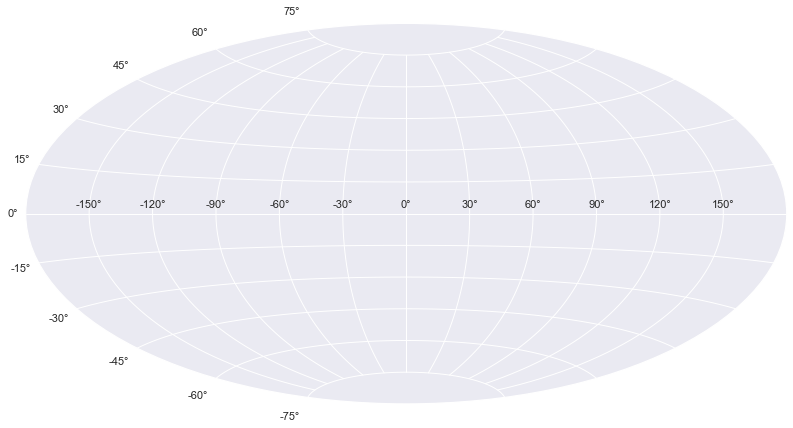

In [6]:
# Ecliptic plane

# lon_ecl = np.linspace(0, 360, 100)
# lat_ecl = np.zeros(100)

# l_ecl_gal, b_ecl_gal = ecl2gal(lon_ecl, lat_ecl)


plt.figure(figsize=(14,7))
ax = plt.subplot(111, projection='aitoff')
# l_sdss2 = np.array(l_sdss)
ra_sdss2 = np.array(ra_sdss)
ax.scatter(ra_sdss2, dec_sdss, alpha=0.5)
# ax.add_patch(e2)

NameError: name 'l_sdss' is not defined

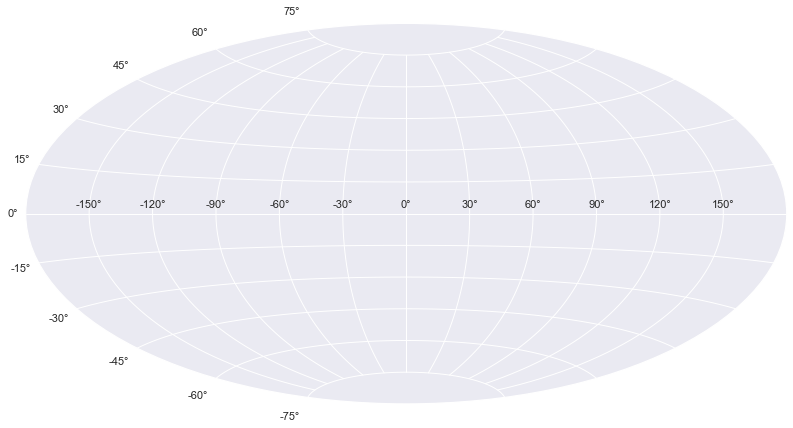

In [9]:
# Ecliptic plane

lon_ecl = np.linspace(0, 360, 100)
lat_ecl = np.zeros(100)

l_ecl_gal, b_ecl_gal = ecl2gal(lon_ecl, lat_ecl)


plt.figure(figsize=(14,7))
ax = plt.subplot(111, projection='aitoff')
l_sdss2 = np.array(l_sdss)
ax.scatter(l_sdss2, b_sdss, alpha=0.5)

plt.xticks(ticks=np.radians([-150, -120, -90, -60, -30, 0, \
                             30, 60, 90, 120, 150]),
           labels=['150°', '120°', '90°', '60°', '30°', '0°', \
                   '330°', '300°', '270°', '240°', '210°']);



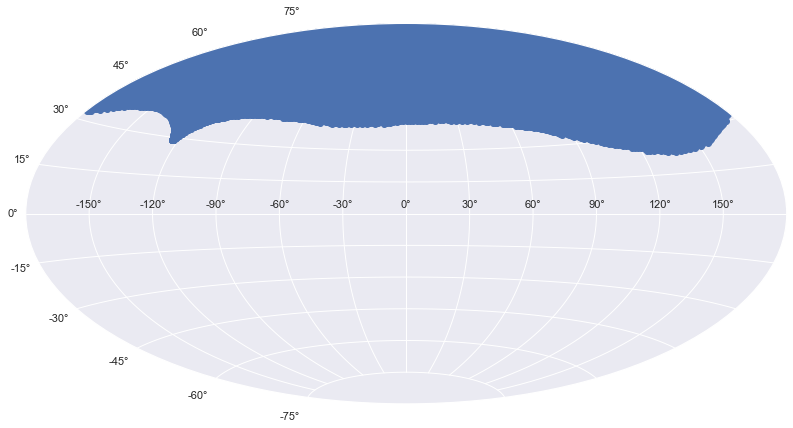

In [134]:
# Ecliptic plane

lon_ecl = np.linspace(0, 360, 100)
lat_ecl = np.zeros(100)

l_ecl_gal, b_ecl_gal = ecl2gal(lon_ecl, lat_ecl)


plt.figure(figsize=(14,7))
ax = plt.subplot(111, projection='aitoff')

ax.scatter(l_sdss[::-1], b_sdss[::-1])

In [17]:
edfs_rad

(1.8140133590229914, -0.8232737199320641)

In [69]:
cosmos_rad[0]

2.149857399630081

In [108]:
np.shape(zoom)

()

[Text(0, 0.625, '37.1'), Text(0, 0.725, '42.12'), Text(0, 0.825, '47.12')]

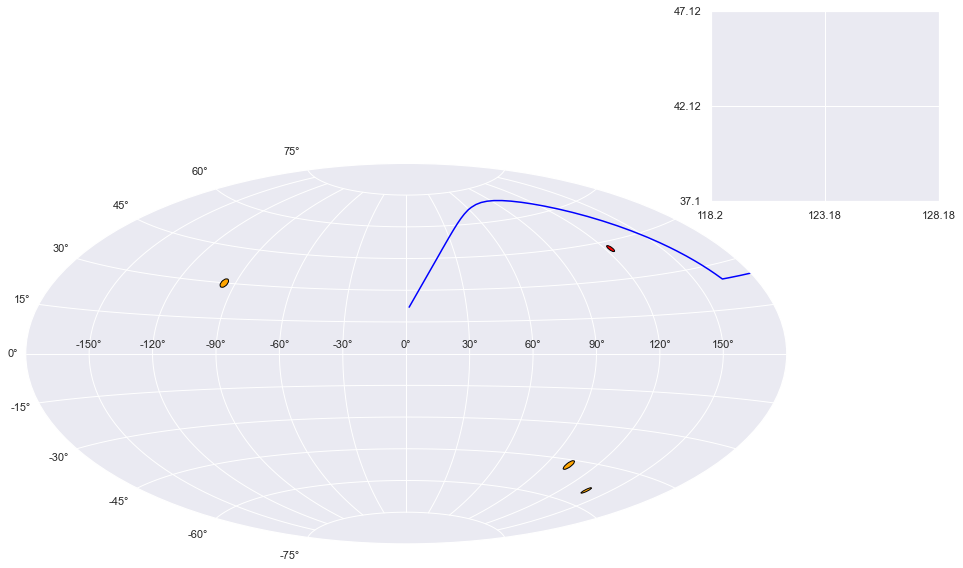

In [110]:
# Ecliptic plane

lon_ecl = np.linspace(0, 360, 100)
lat_ecl = np.zeros(100)

l_ecl_gal, b_ecl_gal = ecl2gal(lon_ecl, lat_ecl)


plt.figure(figsize=(14,7))
ax = plt.subplot(111, projection='aitoff')

# plt.plot(l_sdss, b_sdss)
# #north
# # x_north_line = np.concatenate(([rad(180)], l_ecl_gal[30:71], [rad(-180)]))
x_north_line = np.concatenate(([rad(180)], l_ecl_gal[30:71]))
# # y_north_line = np.concatenate(([b_ecl_gal[30]+0.15], b_ecl_gal[30:71]+0.15, [b_ecl_gal[70]+0.15]))
y_north_line = np.concatenate(([b_ecl_gal[30]+0.15], b_ecl_gal[30:71]+0.15))
plt.plot(x_north_line, y_north_line, c='blue')
# # ax.fill_between(x_north_line, y_north_line, rad(90), interpolate=True, color='blue', alpha=0.5)
# e2 = mpatches.Ellipse((x0, y0), 2*a, 2*b, theta.degree, edgecolor='red',
#                       facecolor='none', transform=ax.get_transform())
# ax.add_patch(e2)


# x_hole_north = np.concatenate(([l_ecl_gal[61]], l_ecl_gal[37:62]))
# y_hole_north = np.concatenate(([b_ecl_gal[61]-0.15], b_ecl_gal[37:62]-0.15))
# plt.plot(x_hole_north, y_hole_north, c='blue')
# plt.plot([l_ecl_gal[37], l_ecl_gal[61]], [b_ecl_gal[37]-0.15, b_ecl_gal[61]-0.15] , c='blue')
# ax.fill_between(x_hole_north, y_hole_north, b_ecl_gal[61]-0.15, color='blue', alpha=0.5)


# # #south
# x_south_line = np.concatenate(([rad(180)], l_ecl_gal[-20:], l_ecl_gal[:20], [rad(-180)]))
# y_south_line = np.concatenate(([b_ecl_gal[-20]-0.15], b_ecl_gal[-20:]-0.15, b_ecl_gal[:20]-0.15, [rad(-29.8)]))
# plt.plot(x_south_line, y_south_line, c='blue')
# ax.fill_between(x_south_line, y_south_line, rad(-90), interpolate=True, color='blue', alpha=0.5)

# plt.plot(l_ecl_gal[:20], b_ecl_gal[:20]-0.15 , c='blue')
# plt.plot(l_ecl_gal[-20:], b_ecl_gal[-20:]-0.15 , c='blue')

# plt.plot([l_ecl_gal[-20], rad(180)], [b_ecl_gal[-20]-0.15, b_ecl_gal[-20]-0.15], c='blue')
# x_hole_south = np.concatenate((l_ecl_gal[:12], l_ecl_gal[-12:]))
# y_hole_south = np.concatenate((b_ecl_gal[:12]+0.15, b_ecl_gal[-12:]+0.15))
# plt.plot(x_hole_south, y_hole_south, color='blue')
# ax.fill_between(x_hole_south, y_hole_south,  b_ecl_gal[-12]+0.15, color='blue', alpha=0.5)

# plt.plot(l_ecl_gal[:12], b_ecl_gal[:12]+0.15 , c='blue')
# plt.plot(l_ecl_gal[-12:], b_ecl_gal[-12:]+0.15 , c='blue')
# plt.plot([l_ecl_gal[-12], l_ecl_gal[11]], [b_ecl_gal[-12]+0.15,  b_ecl_gal[11]+0.15] , c='blue')
# plt.plot([rad(-180), l_ecl_gal[19]], [rad(-29.8), rad(-29.8)], c='blue')

# Essential thing is to rename RA axis ticks to transform them to conventional format
# plt.xticks(ticks=np.radians([-150, -120, -90, -60, -30, 0, \
#                              30, 60, 90, 120, 150]),
#            labels=['150°', '120°', '90°', '60°', '30°', '0°', \
#                    '330°', '300°', '270°', '240°', '210°']);



edfn_rad = eq2gal(269.73291667, 66.01769444)
#
edfn = Circle((edfn_rad[0], edfn_rad[1]), rad(np.sqrt(20/(2*np.pi))), edgecolor='black', facecolor='orange')
ax.add_patch(edfn)

fornax_rad = eq2gal(52.93583333, -28.08850000)
fornax = Circle((fornax_rad[0], fornax_rad[1]), rad(np.sqrt(10/(2*np.pi))), edgecolor='black', facecolor='orange')
ax.add_patch(fornax)
# plt.scatter(fornax_rad[0], fornax_rad[1], s=30, c='red')


edfs_rad = eq2gal(61.241, -48.42300000)
edfs = Circle((edfs_rad[0], edfs_rad[1]), rad(np.sqrt(23/(2*np.pi))), edgecolor='black', facecolor='orange')
ax.add_patch(edfs)

cosmos_rad = eq2gal(150.11916667,2.20583333)
cosmos = Circle((cosmos_rad[0], cosmos_rad[1]), rad(np.sqrt(10/(2*np.pi))), edgecolor='black', facecolor='red')
cosmos_zoom = Circle((cosmos_rad[0], cosmos_rad[1]), rad(np.sqrt(10/(2*np.pi))), edgecolor='black', facecolor='red')
ax.add_patch(cosmos)

zoom = ax.inset_axes([0.9, 0.9, 0.3, 0.5])#, transform=ax.transData)
sx = 5
sy = 5
zoom.add_patch(cosmos_zoom)
zoom.set_xlim(cosmos_rad[0]-rad(sx), cosmos_rad[0]+rad(sx))
zoom.set_ylim(cosmos_rad[1]-rad(sy), cosmos_rad[1]+rad(sy))
# ax.indicate_inset_zoom(zoom)#, edgecolor="black", lw=10);
xticks = list(zoom.get_xticks())
yticks = list(zoom.get_yticks())
zoom_xticks = [xticks[0], (xticks[-1] + xticks[0]) / 2, xticks[-1]]
zoom_yticks = [yticks[0], (yticks[-1] + yticks[0]) / 2, yticks[-1]]
# print(list(zoom.get_xticks()))
zoom.set_xticks(zoom_xticks)
zoom.set_yticks(zoom_yticks)
zoom.set_xticklabels([np.round(deg(cosmos_rad[0])-sx, 1), np.round(deg(cosmos_rad[0]),2), np.round(deg(cosmos_rad[0])+sx, 2)])
zoom.set_yticklabels([np.round(deg(cosmos_rad[1])-sy, 1), np.round(deg(cosmos_rad[1]),2), np.round(deg(cosmos_rad[1])+sy, 2)])
# zoom.set_xticks(np.linspace(0, 2));
# zoom.set_xticklabels(cosmos_rad-10, cosmos)


In [115]:
deg(cosmos_rad[0])

123.17775555377364

In [31]:
# Ecliptic plane

lon_ecl = np.linspace(0, 360, 100)
lat_ecl = np.zeros(100)

l_ecl_gal, b_ecl_gal = ecl2gal(lon_ecl, lat_ecl)


plt.figure(figsize=(14,7))
ax = plt.subplot(111, projection='aitoff')

ax.plot(l_sdss, b_sdss)
# x_north_line = np.concatenate(([rad(180)], l_ecl_gal[30:71], [rad(-60)]))

# y_north_line = np.concatenate(([b_ecl_gal[30]+0.15], b_ecl_gal[30:71]+0.15, [b_ecl_gal[29]+0.15]))
# plt.plot(x_north_line, y_north_line, c='blue')

# Essential thing is to rename RA axis ticks to transform them to conventional format
# plt.xticks(ticks=np.radians([-150, -120, -90, -60, -30, 0, \
#                              30, 60, 90, 120, 150]),
#            labels=['150°', '120°', '90°', '60°', '30°', '0°', \
#                    '330°', '300°', '270°', '240°', '210°']);



ValueError: cannot reshape array of size 0 into shape (0,newaxis)

<Figure size 1008x504 with 1 Axes>

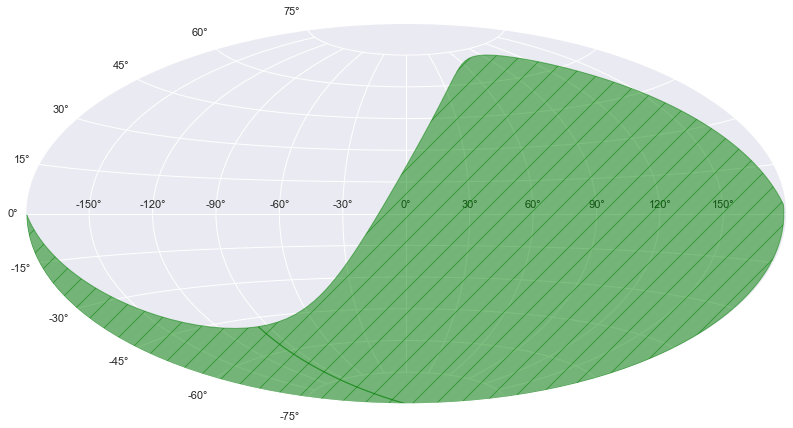

In [ ]:
# Ecliptic plane

lon_ecl = np.linspace(0, 360, 100)
lat_ecl = np.zeros(100)

l_ecl_gal, b_ecl_gal = ecl2gal(lon_ecl, lat_ecl)


plt.figure(figsize=(14,7))
ax = plt.subplot(111, projection='aitoff')

x_ecliptic = np.concatenate((l_ecl_gal[:21], l_ecl_gal[22:-1]))
y_ecliptic = np.concatenate((b_ecl_gal[:21], b_ecl_gal[22:-1]))

# plt.plot(x_ecliptic, y_ecliptic)
start=22
end=100
start2=0
end2=22
ax.fill_between(l_ecl_gal[start:end], b_ecl_gal[start:end]+0.2, rad(-90), color='green', hatch="/",alpha=0.5)
ax.fill_between(l_ecl_gal[start2:end2], b_ecl_gal[start2:end2]+0.2, rad(-90), color='green', hatch="/",alpha=0.5)

# ax.fill_between(l_ecl_gal, b_ecl_gal, rad(-90), color='blue', alpha=0.5)

#north

In [ ]:
cosmos_rad

(2.149857399630081, 0.7351611380965976)

https://www.cosmos.esa.int/web/euclid/euclid-survey


### EDFN Equatorial (celestial) coordinates (RA/DEC):

 17:58:55.9 = 269.73291667

 +66:01:03.7 = 66.01769444 


 ### FORNAX Equatorial (celestial) coordinates (RA/DEC):

 03:31:43.6 = 52.93583333       

 -28:05:18.6 = -28.08850000
 
 
 ### EDFS
 Equatorial (celestial) coordinates (RA/DEC):

 04:04:57.84 = 61.24100000
 
 -48:25:22.8 = -48.42300000

### COSMOS FIELD
 Equatorial (celestial) coordinates (RA/DEC):

10:00:24 : 

02:10:55 :

150.11916667 

2.20583333
